# **Modelo predictivo**

**Integrantes:**

**Juan David Julio San Juan**

**Camilo José Sinning López**


Este modelo tomará como entradas el nombre del departamento y la aprobación en eduación media de esta para predecir deserción alta o baja a travez de un modelo de regresión logistica.

## **Se carga la base de datos**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219 entries, 0 to 11218
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          11219 non-null  int64  
 1   CÓDIGO_MUNICIPIO             11219 non-null  int64  
 2   MUNICIPIO                    11219 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          11219 non-null  int64  
 4   DEPARTAMENTO                 11219 non-null  object 
 5   CÓDIGO_ETC                   11219 non-null  int64  
 6   ETC                          11219 non-null  object 
 7   POBLACIÓN_5_16               11213 non-null  float64
 8   TASA_MATRICULACIÓN_5_16      11104 non-null  float64
 9   COBERTURA_NETA               11108 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    11167 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      11128 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    11125 non-null  float64
 13  COBERTURA_NETA_M

In [ ]:
df.columns

Index(['AÑO', 'CÓDIGO_MUNICIPIO', 'MUNICIPIO', 'CÓDIGO_DEPARTAMENTO',
       'DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
   

## **Se filtran las columnas que no son de interes**

In [ ]:
cols = ['DEPARTAMENTO','DESERCIÓN_MEDIA','APROBACIÓN_MEDIA'];
df_model = df[cols]

Se remueven las filas que tienen algun campo NaN

In [ ]:
df_model = df_model.dropna()

Se cambia la columna categorica 'DEPARTAMENTO' por dummies 

In [ ]:
dept = pd.get_dummies(df_model.DEPARTAMENTO, prefix='DEPARTAMENTO')
dept.head()
df_model = df_model.join(dept)
df_model.drop(['DEPARTAMENTO'], axis=1, inplace=True)

Se crea una nueva columna que contendrá lo que consideramos Deserción alta o baja dependiento de el porcentaje que cada fila muestra en 'DESERCIÓN_MEDIA'.

Nota: Se usa 4 para determinar si más de eso es deserción alta y menos de eso es deserción baja.

In [ ]:
df_model['DESERCIÓN_MEDIA_CAT'] = df_model['DESERCIÓN_MEDIA'].map(lambda x: 1 if x>=4 else 0)
df_model = df_model.drop(['DESERCIÓN_MEDIA'], axis = 1)

## **Se crea el modelo**

Se definen las variables de entrada y salida

In [ ]:
X = df_model.drop(['DESERCIÓN_MEDIA_CAT'], axis = 1);
y = df_model.DESERCIÓN_MEDIA_CAT.copy();

Se hace la separación de datos para entrenamiento y datos para validación

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

Se entrena y prueba el modelo

Nota: se aumentan las iteraciones por recomendación de la libreria sklearn

In [ ]:
model = LogisticRegression(max_iter=1000)
log_mod = model.fit(X_train, y_train)
log_mod.score(X_val, y_val)

0.7597071928707829

Hacemos 1000 veces el modelo para determinar el score promedio y a varianza.

In [ ]:
succ = [];
for i in range(10):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
  log_mod = LogisticRegression(max_iter=1000).fit(X_train, y_train);
  succ.append(log_mod.score(X_val, y_val));


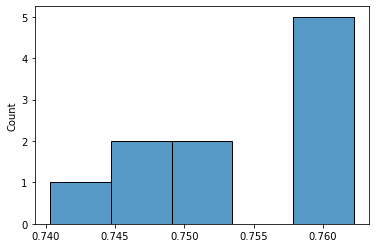

In [ ]:
import seaborn as sns
import numpy as np
sns.histplot(succ)
succ = np.array(succ);

In [ ]:
np.mean(succ)

0.753341820496499

In [ ]:
np.var(succ)

5.2328952395847385e-05

# **Comprobar hipotesis**

Los municipios mas rurales presentan una mayor tasa de deserción.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv')

In [ ]:
# log_mod.predict_proba(X)

739


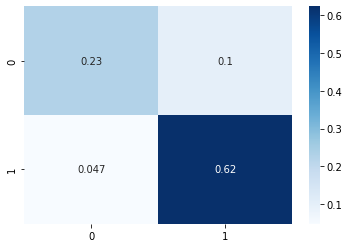

In [ ]:
cols = ['DEPARTAMENTO','DESERCIÓN_MEDIA','APROBACIÓN_MEDIA'];
df_model = df[cols]
df_model = df_model.dropna()
dept = pd.get_dummies(df_model.DEPARTAMENTO, prefix='DEPARTAMENTO')
df_model = df_model[ (df_model['DEPARTAMENTO'] == 'Guainía') | (df_model['DEPARTAMENTO'] == 'Vichada') | (df_model['DEPARTAMENTO'] == 'Vaupés') | (df_model['DEPARTAMENTO'] == 'Putumayo') | (df_model['DEPARTAMENTO'] == 'Bogotá, D.C.') | (df_model['DEPARTAMENTO'] == 'Islas') | (df_model['DEPARTAMENTO'] == 'Atlántico') | (df_model['DEPARTAMENTO'] == 'Caldas')]
df_model['Resultado'] = df_model['DEPARTAMENTO'].map(lambda x: 1 if (x=='Guainía' or x=='Vichada' or x=='Vaupés' or x=='Putumayo') else 0)
dept.head()
df_model = df_model.join(dept)
df_model.drop(['DEPARTAMENTO'], axis=1, inplace=True)
df_model = df_model.drop(['DESERCIÓN_MEDIA'], axis = 1)
X = df_model.drop(['Resultado'], axis = 1);
Y = df_model['Resultado']
y_pred = log_mod.predict(X)
print(len(Y))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y, y_pred, labels=[1, 0])/len(Y), annot = True, cmap = 'Blues')

